# Import Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import cm as c

from val import *
from train import *

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


tf.enable_eager_execution() 

# Define/Import your own model

In [4]:
#################### edit this part ######################
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, padding='SAME', 
                                  input_shape=(None, None,3)))
    model.add(keras.layers.MaxPool2D())
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D())
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D())
    model.add(keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(1))
    return model

In [5]:
model = create_model()

# Train model

In [ ]:
# define epochs and learning rates 
#############edit this if you want to change epochs or lr###############
fit(model, epochs=1, learning_rate = 0.02)

# Visualize test outputs

Predicted Count :  599


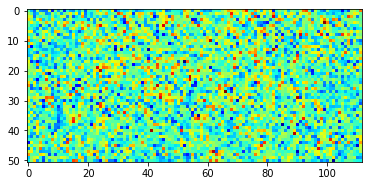

Original Count :  380
Original Image


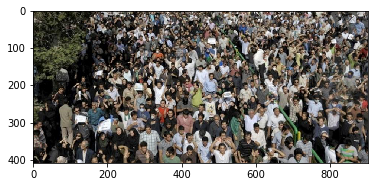

In [6]:
#############change test_input to check how your model works with a test data#######
generate_images(model, test_input = 'ShanghaiTech/part_A/test_data/images/IMG_100.jpg')